S spletne strani FIS sem zbrala podatke o tekmah v zadnjih 11 sezonah Svetovnega pokala v smučarskih skokih (od sezone 2005/2006 do letošnje - 2015/2016). podatki so zbrani v štirih tabelah - v eni so opisi tekmovalcev, v drugi opisi tekmovališč, v tretji je seznam vseh tekem v zadnjih 11 sezonah, v zadnji pa uvrstitve tekmovalcev, ki so na vsaki tekmi osvojili točke svetovnega pokala. 

Od rednem spremljanju skokov se mi postavljajo številna vprašanja in na nekatera bom poskusila odgovoriti. Končno. :)

In [1]:
import pandas as pnd
pnd.options.display.max_rows = 20

tekmovalci = pnd.read_csv('Documents/sola/PROG1/projekt/podatki/csv_tekmovalci.csv', index_col = 'id_tekmovalca')
prizorisca = pnd.read_csv('Documents/sola/PROG1/projekt/podatki/csv_prizorisca.csv', index_col = 'id_prizorisca')
tekmovanja = pnd.read_csv('Documents/sola/PROG1/projekt/podatki/csv_tekmovanja.csv', index_col = 'id_tekme')
uvrstitve = pnd.read_csv('Documents/sola/PROG1/projekt/podatki/csv_uvrstitve.csv')

## 1. Kdo ima najdaljši povprečni skok?

Očitno bomo potrebovali dolžine vseh skokov, ki jih najdemo v tabeli uvrstitve:

In [2]:
uvrstitve[:5]

,id_tekme,id_tekmovalca,uvrstitev,dolzina1,dolzina2,tocke
0,1905,2917,1,224.0,224.0,450.1
1,1905,2033,2,215.5,220.5,434.7
2,1905,2815,3,219.5,218.0,431.0
3,1905,2062,4,212.5,222.0,426.9
4,1905,2030,5,215.0,217.0,425.4


V resnici nas nikoli ne zanimata dolžini posameznih skokov, zato lahko našo tabelo spremenimo v tako, da bo vsebovala le povprečno dolžino skoka na tekmi.

In [43]:
uvrstitve['dolžina'] = (uvrstitve['dolzina2']+uvrstitve['dolzina1'])/2
uvrstitve_dolzina = uvrstitve.drop(['dolzina1', 'dolzina2'], axis = 1)
uvrstitve_dolzina[:3]

,id_tekme,id_tekmovalca,uvrstitev,tocke,dolžina
0,1905,2917,1,450.1,224.00
1,1905,2033,2,434.7,218.00
2,1905,2815,3,431.0,218.75


Poglejmo kdo ima torej najdaljši poprečni skok:

In [44]:
dosežki = uvrstitve_dolzina.groupby('id_tekmovalca')
dolzine = dosežki.mean().sort_values('dolžina', ascending = False).drop('id_tekme', axis = 1)
dolzine[:5]

,uvrstitev,dolžina
id_tekmovalca,,
4334,25.500000,196.625
6671,30.000000,194.000
4176,27.000000,188.250
5626,24.666667,177.750
5293,27.000000,177.500


Tekmovalec z najdaljšim skokom je torej 4334. Kdo pa je to? Poglejmo kar za vse:

In [45]:
pnd.merge(tekmovalci, dolzine, left_index = True, right_index = True)[:10]

,ime,nacionalnost,letnica,uvrstitev,dolžina
id_tekmovalca,,,,,
4334,Zupan Bine,SLO,1984,25.500000,196.625000
6671,Bickner Kevin,USA,1996,30.000000,194.000000
4176,Grimholm Isak,SWE,1985,27.000000,188.250000
5626,Semenic Anze,SLO,1993,24.666667,177.750000
5293,Bjerkeengen Fredrik,NOR,1988,27.000000,177.500000
5063,Kozisek Cestmir,CZE,1991,23.714286,175.666667
6085,Hofer Thomas,AUT,1996,22.666667,166.416667
7256,Bjoereng Joacim Oedegaard,NOR,1995,28.000000,165.250000
4333,Urbanc Rok,SLO,1985,16.750000,162.666667


Hm... Bine Zupan? Prvič slišim. Drugo mesto: Kevin Bickner? Kako sta to lahko tekmovalca z najdaljšima povprečnima skokoma, saj ju skoraj nihče ne pozna? Če pogledamo še malo natančneje, pravzaprav poznamo res bolj malo tekmovalcev, pa še ti ki jih poznamo so Slovenci, ki niso bili nikoli med najuspešnejšimi - tudi njihove povprečne uvrstitve so skoraj vse nad 20. mestom. Povprečni skok 181 m je verjetno možen le na letalnicah, kar se je verjetno tudi zgodilo, Bine Zupan se je uspel uvrstiti na več tekem v poletih, kot na običajnih, velikih skakalnicah. To anomalijo bi bilo potrebno odpraviti. 
Izberimo le tiste tekmovalce, ki imajo vsaj za približno eno sezono uvrstitev. Koliko bi to bilo?

In [6]:
tekmovanja.groupby('sezona').count().mean()

id_prizorisca    26.363636
datum            26.363636
dtype: float64

Izberimo tekmovalce, ki imajo vsaj 26 uvrstitev, vsakemu tekmovalcu bomo dodali število uvrstitev med 30 najboljših v zadnjih 10 letih:

In [46]:
število_uvrstitev = uvrstitve1[['uvrstitev', 'id_tekmovalca']].groupby('id_tekmovalca').count()\
                    .rename(columns = {'uvrstitev':'št_uvrstitev'})

tekm_uvrst = pnd.merge(tekmovalci, število_uvrstitev, right_index = True, left_index = True)

povprecni_skoki = pnd.merge(tekm_uvrst, dolzine, left_index = True, right_index = True)

povprecni_skoki[povprecni_skoki.št_uvrstitev >= 26][:20]

,ime,nacionalnost,letnica,št_uvrstitev,uvrstitev,dolžina
id_tekmovalca,,,,,,
6100,Forfang Johann Andre,NOR,1995,43,9.581395,150.725000
4646,Tepes Jurij,SLO,1989,100,15.650000,147.728022
5749,Evensen Johan Remen,NOR,1985,56,14.232143,146.475490
5039,Poppinger Manuel,AUT,1989,37,20.270270,146.316176
6098,Tande Daniel Andre,NOR,1994,35,11.457143,146.060606
5972,Fannemel Anders,NOR,1991,89,11.966292,145.734756
4724,Morassi Andrea,ITA,1988,28,21.250000,145.682692
5174,Stjernen Andreas,NOR,1988,76,16.434211,144.476027
4593,Hajek Antonin,CZE,1987,48,20.125000,144.087500


Rezultati so očitno boljši kot prej, saj je sedaj na vrhu razpredelnice zelo znan obraz: Johann Andre Forfang. Na drugem mestu je naš Jurij Tepeš. Morda malce presenetljivo, ampak kot vidimo pri njemu gotovo ne gre za premajhno število nastopov, saj jih ima več kot ostalih 10 najboljših. Očitno je torej Jurij zelo dober letalec, vendar pa se je redkeje uvrščal v finale na preostalih tekmah. Če pogledamo povprečne uvrstitve teh tekmovalcev tudi vidimo, da je nekaj tekmovalcev v vrhu s precej nizko povprečno uvrstitvijo (npr. Poppinger, Morassi), Schlierenzauer pa je šele na 18. mestu, čeprav je tudi on izjemen letalec, njegova povprečna uvrstitev pa je 7. mesto.

Očitno na ta način še vedno ne dobimo najboljših skakalcev, ampak letalce, kar je prav tako zanimivo.

Poglejmo pa si še, kateri skakalci imajo najboljše povprečne uvrstitve. Na tem seznamu pa bi se res morali pojaviti le dobri skakalci, saj le redkokdo zmaga, čeprav nastopa le na dveh ali treh tekmah:

In [47]:
povprecni_skoki.sort_values(by = 'uvrstitev')[:20]

,ime,nacionalnost,letnica,št_uvrstitev,uvrstitev,dolžina
id_tekmovalca,,,,,,
5040,Schlierenzauer Gregor,AUT,1990,209,6.933014,140.136243
4143,Morgenstern Thomas,AUT,1986,179,7.363128,136.649682
2039,Malysz Adam,POL,1977,124,8.064516,138.504425
4197,Freund Severin,GER,1988,162,8.827160,140.500000
2067,Ammann Simon,SUI,1981,241,9.116183,138.974771
5658,Prevc Peter,SLO,1992,156,9.416667,140.661972
6100,Forfang Johann Andre,NOR,1995,43,9.581395,150.725000
5497,Kraft Stefan,AUT,1993,91,10.439560,140.942771
4889,Jacobsen Anders,NOR,1985,142,10.485915,140.476000


Res, na seznamu najdemo le štiri tekmovalce z manj kot 50 uvrstitvami, od tega so trije Norvežani, ki šele začenjajo svojo kariero, pa so kljub temu res že del elite v skokih, najmanj uvrstitev pa ima Andreas Widhoelzl, ki pa je deset let nazaj ravno zaključeval svojo kariero. Ta seznam nam očitno res da zelo dober vpogled v to, kateri skakalci so najbolj krojili vrh smučarskih skokov v zadnjih letih. Glede na povprečno uvrstitev je najboljši skakalec torej Gregor Schlierenzauer, Peter Prevc, kot vodilni Slovenec pa je na 6. mestu.

## 2. Ali so tekmovalci uspešnejši na domačih skakalnicah?

To vprašanje je seveda smiselno le za tiste tekmovalce, ki prihajajo iz držav, v katerih prirejajo tekme svetovnega pokala. Večina prizorišč se ponovi skoraj vsako leto, so pa tudi takšna, ki pridejo na koledar le za kakšno sezono. Najbolj tipična takšna prizorišča so prizorišča olimpijskih iger, kot na primer Vancouver in Soči, kjer so bile tekme svetovnega pokala le dvakrat, vendar pa jih je vseeno smiselno upoštevati, morda je problematično le, če je bil kakšen tekmovalec v najboljši formi prav tisto sezono, ko je tekma potekala v njegovi domovini, saj v tem primeru ta rezultat res odstopa od povprečja vseh ostalih sezon. Smilseno bi zato bilo, da gledamo odstopanja v posameznih sezonah, saj je običajno znotraj ene sezone tekmovalec približno konstanten.

Ustvarimo veliko tabelo z uvrstitvami, tekmovališči, sezonami in nacionalnostmi, da bomo imeli vse te podatke zbrane na enem mestu.

In [9]:
rezultati1 = pnd.merge(uvrstitve, tekmovanja, left_on = 'id_tekme', right_index = True)\
            .drop(['dolzina1', 'dolzina2', 'tocke','datum'], axis = 1)
    
rezultati2 = pnd.merge(rezultati1, prizorisca, left_on = 'id_prizorisca', right_index = True)

rezultati_vse = pnd.merge(rezultati2, tekmovalci, left_on = 'id_tekmovalca', right_index = True)\
            .drop(['id_tekmovalca','id_prizorisca','id_tekme'], axis = 1)

In [10]:
rezultati_vse

,uvrstitev,sezona,kraj,država,ime,nacionalnost,letnica
0,1,2006,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
55,26,2007,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
62,3,2008,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
2134,5,2006,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
2169,10,2007,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
2259,10,2011,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
2289,10,2012,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
4398,17,2007,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
5862,12,2011,Planica,SLO,Romoeren Bjoern Einar,NOR,1981
5889,9,2012,Planica,SLO,Romoeren Bjoern Einar,NOR,1981


Iz te tabele bi radi dobili tiste tekmovalce ki so v eni sezoni nastopili tako na domači kot kakšni drugi tekmi. In izračunali povprečno uvrstitev na tujih in na domačih tekmah.

In [49]:
doma = rezultati_vse[rezultati_vse.država == rezultati_vse.nacionalnost]\
        .rename(columns = {'uvrstitev' : 'uvrstitev doma'}).drop('letnica', axis = 1)
drugje = rezultati_vse[rezultati_vse.država != rezultati_vse.nacionalnost]\
        .rename(columns = {'uvrstitev' : 'uvrstitev drugje'}).drop('letnica', axis = 1)
primerjava = pnd.merge(doma.groupby(['ime','sezona']).mean(), drugje.groupby(['ime','sezona']).mean(),\
                       right_index = True, left_index = True)

In [50]:
primerjava

uvrstitev doma  uvrstitev drugje
ime                  sezona                                  
Ahonen Janne         2006               8.0          6.187500
                     2007               8.0         10.882353
                     2008               8.0          6.181818
                     2010              27.0          8.384615
                     2014              28.0         19.000000
                     2015              24.5         25.666667
Ammann Simon         2006              14.0         16.764706
                     2007               3.0          6.857143
                     2008              18.0          9.869565
                     2009               2.0          3.760000
...                                     ...               ...
Ziobro Jan           2014              13.5         17.090909
                     2015              23.0         23.166667
Zniszczol Aleksander 2012              11.5         18.000000
                     2015              21.0         24.500000
Zyla Piotr           2011              21.0         25.600000
                     2012              17.0         19.000000
                     2013              12.0         14.500000
                     2014              15.5         16.411765
                     2015              28.0         14.920000
                     2016              18.0         16.400000

[504 rows x 2 columns]

Naslednji korak je, da pogledamo za vsak vnos v tabeli kakšna je razlika med uvrstitvijo doma in na tujem, in jih sešteti. Če je vsota negativna, bo to pomenilo, da so tekmovalci uspešnejši doma, ker je nižja uvrstitev boljša :)

In [13]:
razlika = sum(primerjava['uvrstitev doma'] - primerjava['uvrstitev drugje'])
razlika

-406.72534032891076

Primerjajmo to še z vsoto uvrstitev, če jih ne odštejemo med seboj:

In [14]:
celota = (sum(primerjava['uvrstitev drugje']),sum(primerjava['uvrstitev doma']))
razlika/celota

array([-0.04756189, -0.04993699])

Vidimo torej, da so tekmovalci približno 4,8% uspešnejši na domačih kot na tujih tekmah.

## 3. Kakšni bi bili rezultati svetovnega pokala, če bi štele le dolžine skokov?

Poleg dolžin se pri skokih upošteva tudi slog skakanja - mirnost in figura v zraku, pristanek... V zadnjih letih pa se tudi izravnava veter, torej tisti, ki imajo močnejši veter v hrbet dobijo nekaj dodatnih točk, saj jih ta veter ovira pri skakanju.
To točkovanje je zelo pomembno, vendar pa se nam vseeno pogosto zdi, da so sodniki pristranski pri ocenjevanju. Zanima me, ali je morda ta pristranskost kdaj bistveno vplivala na izid svetovnega pokala - na zmagovalca. Seveda ta analiza ne bo odgovorila na to vprašanje, saj tekmovalcev ne bomo poskusili še enkrat oceniti, pa vendar, poglejmo kako bi se izšlo.

In [15]:
# uvrstitvam dodamo skupno dolžino skokov:
dolzina = uvrstitve['dolzina1'] + uvrstitve['dolzina2'].fillna(0)
uvrstitve3 = pnd.concat([uvrstitve, dolzina], axis = 1)\
        .rename(columns = {0 : 'dolžina'}) 
# uvrstitvam dodamo stolpec sezona in odstranimo nepotrebne stolpce:
uvrstitve_sezone = pnd.merge(uvrstitve3, tekmovanja, left_on = 'id_tekme', right_index = True)\
        .drop(['tocke','id_prizorisca','datum','dolzina1', 'dolzina2'], axis = 1)
uvrstitve_sezone[:3]

,id_tekme,id_tekmovalca,uvrstitev,dolžina,sezona
0,1905,2917,1,448.0,2006
1,1905,2033,2,436.0,2006
2,1905,2815,3,437.5,2006


In [16]:
uvrstitve_urejene = uvrstitve_sezone.set_index(['sezona','id_tekme']).sort_index()

uvrstitve_urejene

id_tekmovalca  uvrstitev  dolžina
sezona id_tekme                                   
2006   1874               1984          1    140.5
       1874               1995          2    138.5
       1874               2918          3    137.5
       1874               2010          4    137.5
       1874               2985          5    137.5
       1874               4143          6    133.5
       1874               2039          7    132.5
       1874               2092          8    131.5
       1874               2929          9    131.5
       1874               4141         10    132.5
...                        ...        ...      ...
2016   4461               4321         21    416.0
       4461               5039         22    416.5
       4461               5142         23    421.5
       4461               5567         24    425.5
       4461               4322         25    418.0
       4461               5262         26    410.5
       4461               2947         27    403.0
       4461               5974         28    399.0
       4461               6437         29    407.0
       4461               4226         30    404.0

[8701 rows x 3 columns]

Iz urejene tabele uvrstitev sedaj lahko preprosto dostopamo do posamičnih tekem:

In [17]:
uvrstitve_urejene.loc[(2006,1987)][:5]

id_tekmovalca  uvrstitev  dolžina
sezona id_tekme                                   
2006   1987               2039          1    255.0
       1987               4143          2    253.0
       1987               4141          3    252.5
       1987               2092          4    254.0
       1987               1984          5    250.5

Za nadaljno obravavno bomo potrebovali seznam, koliko kakšna uvrstitev prinese točk v svetovnem pokalu. Na wikipediji (https://en.wikipedia.org/wiki/FIS_Ski_Jumping_World_Cup) najdemo seznam:

|Place |1|	2| 3| 	4| 	5| 	6| 	7| 	8| 	9| 	10| 11|	12 	|13|14| 15|	16| 17| 18| 19 |20|	21| 22| 23|24|25|26| 27| 28|29|	30|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Points|100|80|	60| 50| 45| 40 |36|	32|29|	26|	24 |22 |20|	18| 16 |15|	14| 13| 12 |11|	10| 9| 8| 7| 6| 5| 	4| 	3| 	2| 	1|

Vsakemu tekmovalcu pripišemo novo uvrstitev in ustrezno število točk:

In [18]:
uvrstitev = pnd.Series(list(range(1,31)))
točke = pnd.Series([100,80,60,50,45,40,36,32,29,26,24,22,20,18]+list(range(16,0,-1)))

točkovanje = pnd.concat([uvrstitev, točke], axis = 1)\
        .rename(columns = {1:'točke', 0: 'uvrstitev'})

Pripravili si bomo kar funkcijo, ki bo uredila tekmo. Pozorni moramo biti na to, da tekmovalca z enako dolžino dobita enako število točk.

In [51]:
def uredi_tekmo(tekma):
    stare_točke = pnd.merge(tekma, točkovanje, on = 'uvrstitev')
    poprav =  pnd.merge(stare_točke, točkovanje.rename(columns = {'točke':'nove t.'}), right_index = True, left_index = True)
    
    dolzp = 2
    tockep = 0
    for i in range(len(poprav)):
        dolz = tekma.iloc[i]['dolžina']
        if dolzp == dolz:
            poprav.ix[i,'nove t.']=tockep
        else:
            dolzp = dolz
            tockep = poprav.loc[i]['nove t.']
    return poprav[['id_tekmovalca', 'točke', 'nove t.']]

Preverimo, ali funkcija deluje:

In [52]:
testna = uvrstitve_urejene.loc[(2006,1987)].sort_values(by = 'dolžina', ascending = False)
uredi_tekmo(testna)[:10]

,id_tekmovalca,točke,nove t.
0,2039,100,100
1,2092,50,80
2,4143,80,60
3,4141,60,50
4,2815,40,45
5,1991,36,40
6,1984,45,36
7,3012,32,32
8,2062,29,29
9,2917,26,29


Sedaj uredimo vsako tekmo posebej, pri tem pa sestavljamo novo tabelo, v kateri bodo vsi ti naši željeni stolpci. Pri tem lahko izgubimo podatek o tekmah, nikakor pa ne smemo izgubiti podatka o sezoni iz katere je rezultat.

In [21]:
sezone = uvrstitve_urejene.index.get_level_values(0).unique()

vse = pnd.DataFrame()

for sezona in sezone:
    tekme_sezone = uvrstitve_urejene.loc[sezona].index.get_level_values(0).unique()
    sezonska = pnd.DataFrame()
    št_tekem = 0
    
    for tekma in tekme_sezone:
        tekmica = uvrstitve_urejene.loc[(sezona,tekma)].sort_values(by = 'dolžina', ascending = False)
        tekmapoprav = uredi_tekmo(tekmica)
        sezonska = pnd.concat([sezonska,tekmapoprav])
        št_tekem +=1
    
    sezonska['sezona'] = sezona
    
    vse = pnd.concat([vse, sezonska])

Uredimo dobljeno tabelo:

In [53]:
rezultati = vse.groupby(['sezona', 'id_tekmovalca'])
rezult = rezultati.sum()
rezult.reset_index(level=1, inplace=True)
rezult.reset_index(level=0, inplace=True)

po_imenih = rezult.merge(tekmovalci, left_on='id_tekmovalca', right_index = True)\
            .drop(['letnica','id_tekmovalca', 'nacionalnost'], axis = 1)
po_imenih[:5]

,sezona,točke,nove t.,ime
0,2006,59,53,Hoellwarth Martin
87,2007,284,285,Hoellwarth Martin
177,2008,26,25,Hoellwarth Martin
1,2006,57,62,Schwarzenberger Reinhard
2,2006,1151,1153,Janda Jakub


In [23]:
po_sezonah1 = po_imenih.groupby('sezona')['točke'].transform(max)==po_imenih['točke']
po_sezonah2 = po_imenih.groupby('sezona')['nove t.'].transform(max)==po_imenih['nove t.']

Tako, vse je pripravljeno za rezultate - poglejmo si najprej, kdo so bili zmagovalci po veljavnem točkovanju svetovnega pokala:

In [58]:
po_imenih[po_sezonah1].sort_values(by = 'sezona').drop('nove t.', axis = 1)

,sezona,točke,ime
2,2006,1151,Janda Jakub
104,2007,1453,Malysz Adam
228,2008,1794,Morgenstern Thomas
337,2009,2083,Schlierenzauer Gregor
369,2010,1649,Ammann Simon
482,2011,1757,Morgenstern Thomas
548,2012,1325,Bardal Anders
641,2013,1620,Schlierenzauer Gregor
709,2014,1420,Stoch Kamil
786,2015,1729,Freund Severin


V sezoni 2014/2015 imamo dva vnosa, saj sta imela  SEverin Freund in Peter Prevc enako število točk v skupnem seštevku. Zmagal je Severin Freund zaradi večjega števila zmag v sezoni.

Oglejmo si še, kdo bi bili zmagovalci, če bi štele le dolžine skokov:

In [61]:
po_imenih[po_sezonah2].sort_values(by = 'sezona').drop('točke', axis = 1)

,sezona,nove t.,ime
2,2006,1153,Janda Jakub
104,2007,1477,Malysz Adam
228,2008,1718,Morgenstern Thomas
337,2009,2048,Schlierenzauer Gregor
369,2010,1697,Ammann Simon
482,2011,1431,Morgenstern Thomas
548,2012,1286,Bardal Anders
641,2013,1505,Schlierenzauer Gregor
709,2014,1224,Stoch Kamil
833,2015,1630,Prevc Peter


Vidimo, da se z upoštevanjem samo dolžin skokov zmagovalci svetovnega pokala ne bi spremenili, razen v že omenjeni sezoni 2014/2015. S to analizo smo torej ugotovili, da si je Prevc v resnici zaslužil že dva kristalna globusa, sodnike pa bi lahko kar ukinili. :)

## 4. V katerem delu kariere so tekmovalci najuspešnejši?

Večina skakalcev skače več kot 10 let in večina tekmovalcev na seznamu ni še niti končala svoje kariere. Poleg tega niso vsi tekmovalci enako dobri, zato bi za dobro analizo potrebovali nekakšnega povprečnega tekmovalca. Namesto spremljanja posameznih tekmovalcev v različnih fazah kariere, si raje oglejmo, kakšna je povprečna uvrstitev tekmovalca pri posamezni starosti. 

In [62]:
uvrst = pnd.merge(tekmovalci, uvrstitve, left_index = True, right_on = 'id_tekmovalca', how = 'left')

vse_uvrstitve = pnd.merge(uvrst, tekmovanja, left_on = 'id_tekme', right_index = True)\
    .drop(['id_tekme','id_tekmovalca', 'ime', 'id_prizorisca','dolzina1','dolzina2','tocke', 'nacionalnost', 'sezona'], axis =1)

vse_uvrstitve['starost'] = pnd.to_numeric(vse_uvrstitve['datum'].apply(lambda x: x[6:10]))-vse_uvrstitve['letnica']

uvrstitve_starost = vse_uvrstitve.drop(['datum','letnica'], axis = 1)

In [27]:
uvrstitve_starost[:5]

,uvrstitev,starost
54,25,29
57,28,24
46,17,25
42,13,28
34,5,25


Tako smo dobili zelo dolg seznam vseh uvrstitev in starosti tekmovalcev, ki so jih dosegli. Zanima nas povprečna uvrstitev glede na starost, torej moramo združiti vse uvrstitve pri določeni starosti:

In [41]:
urejeni = uvrstitve_starost.groupby('starost').mean()

In [63]:
%matplotlib inline

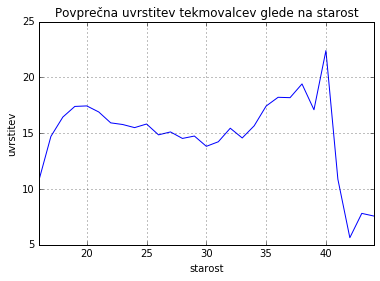

In [64]:
urejeni.plot(legend = False, grid = True, title = 'Povprečna uvrstitev tekmovalcev glede na starost').set_ylabel('uvrstitev')

Če zanemarimo Noriakija Kasaia in nekatere nepolnoletne tekmovalce, ki tekmujejo, ker so pač zelo dobri in torej niso primerljivi s povprečnim skakalcem pri svoji starosti, lahko iz grafa razberemo, da so tekmovalci najuspešnejši okrog 30. leta. Vendar pa so tekmovalci od 23 do 30 let precej izenačeni, po 30. letu pa rezultati kar hitro padejo. Razen seveda za Noriakija Kasaia.